# 8. 성능 최적화 

## 8.1 성능 최적화

### 8.1.1 데이터를 사용한 성능 최적화
- 최대한 많은 데이터 수집하기: 일반적으로 딥러닝이나 머신 러닝 알고리즘은 데이터양이 많을 수록 성능이 좋다. 따라서 가능한 많은 데이터를 수집해야 함
- 데이터 생성하기: 많은 데이터를 수집할 수 없다면 데이터를 만들어 사용(ex. 이미지 조작)
- 데이터 범위(scale) 조정하기: activation function로 sigmoid를 사용하면 dataset 범위가 0 ~ 1의 값을 갖고 tanh를 사용한다면 -1 ~ 1의 값을 갖는다. 그리고 정규화, 규제화, 표준화도 성능 향상에 도움이 된다.

### 8.1.2 알고리즘을 이용한 성능 최적화
머신 러닝과 딥러닝을 위한 알고리즘은 상당히 많고 사용자가 선택한 알고리즘이 최적의 알고리즘이 아닐 수 있다. 따라서 유사한 용도의 알고리즘들을 선택하여 모델을 훈련시켜 보고 최적의 성능을 보이는 알고리즘을 선택해야 한다.

### 8.1.3 알고리즘 튜닝을 위한 성능 최적화
- 성능 최적화를 하는 데 가장 많은 시간이 소요되는 부분
- 모델을 하나 선택해 다양한 하이퍼파라미터를 변경하면서 훈련시키고 최적의 성능을 도출해야 함
- 하이퍼파라미터의 목록
  - **진단**: 성능 향상이 어느 순간 멈추었다면 원인을 분석해야 할 필요가 있음. 문제를 진단하는 데 사용할 수 있는 것이 모델에 대한 평가다.(예를 들어 overfitting인지 다른 원인으로 성능 향상에 문제가 있는지에 대한 insight를 얻을 수 있다)
  - **가중치**: 가중치에 대한 초기값은 작은 난수를 사용한다. 작은 난수라는 숫자가 애매하다면 autoencoder 같은 unsupervised learning을 이용해 pretrain을 진행한 후 supervised learning을 진행할 수도 있음
  - **학습률**: 학습률(learning rate)는 모델의 네트워크 구성에 따라 다르기 때문에 초기에 매우 크거나 작은 임의의 난수를 선택해 학습 결과를 보고 조금씩 수정해야 한다. 네트워크 계층이 많다면 높아야 하고, 계층이 몇 개 되지 않는다면 작게 설정하는 것이 좋다.
  - **활성화 함수**: 활성화 함수(activation function)를 변경할 때는 주의해야 한다. activation function의 종류에 따라 loss function도 변경해야 할 수도 있기 때문이다. 다루고자 하는 데이터 유형 및 데이터로 어떤 결과를 얻고 싶은지 정확하게 이해하고 activation function을 사용해야 한다.
  - **배치와 에포크**: 일반적으로 큰 epoch과 작은 batch를 사용하는 것이 최근 트렌드지만, 적절한 batch size를 위해 train dataset 크기와 동일하게 하거나 하나의 batch로 train 하는 등 다양한 테스트를 진행하는 것이 좋다.
  - **optimizer와 loss function**: 다양한 종류의 optimizer와 loss function이 존재하며 사용자의 목적에 맞춰 optimizer와 loss function을 사용해야 한다.
  - **네트워크 구성**: 네트워크 구성은 network topology라고도 한다. 최적의 네트워크를 구성하는 것은 쉽게 할 수 있는 부분이 아니므로 네트워크 구성을 변경해 가면서 성능을 테스트해야 한다. 예를 들어 하나의 은닉층에 뉴런을 여러 개 포함시키거나(네트워크가 넓다고 표현), 네트워크 계층을 늘리되 뉴런 개수는 줄여볼 수도(네트워크가 깊다고 표현) 있고 두 가지 방법을 결합할 수도 있다.

### 8.1.4 앙상블을 이용한 성능 최적화
앙상블은 간단히 말해 모델을 두 개 이상 섞어서 사용하는 것이다.

## 8.2 하드웨어를 이용한 성능 최적화
딥러닝에서 성능 최적화는 데이터와 알고리즘을 이용하는 것 외에 하드웨어를 이용하는 방법도 있다. 즉, 기본 CPU가 아닌 GPU를 이용하는 방식

### 8.2.1 CPU와 GPU 사용의 차이
CPU 다섯 개를 동시에 돌려도 GPU 한 개보다 성능이 좋지 못한 경우가 존재한다.
- **CPU**는 연산을 담당하는 ALU와 명령어를 해석하고 실행하는 control, 그리고 데이터를 담아두는 cache로 구성되어 있다. 따라서 CPU는 명령어가 입력되는 순서대로 데이터를 처리하는 직렬 처리 방식이다. 즉, CPU는 한 번에 하나의 명령어만 처리하기 때문에 연산을 담당하는 ALU 개수가 많을 필요가 없다.
- **GPU**는 병령 처리를 위해 개발되었다. cache 메모리 비중은 낮고, 연산을 수행하는 ALU 개수가 많아졌다. GPU는 서로 다른 명령어를 동시에 병렬적으로 처리하도록 설계되었기 때문에 성능에 부담이 없다. 즉, GPU는 연산을 수행하는 많은 ALU로 구성되어 있기 때문에 여러 명령을 동시에 처리하는 병렬 처리 방식에 특화되어 있다. 또한, 하나의 코어에 ALU 수백~수천 개가 장착되어 있기 때문에 CPU로는 시간이 많이 걸리는 3D 그래픽 작업 등을 빠르게 수행할 수 있다.
- 개별적 코어 속도는 CPU가 GPU보다 훨씬 빠르다. CPU와 GPU는 각자 적합한 분야가 존재한다.
- 예를 들어 재귀 연산이 대표적인 직렬 연산인데 3x3 행렬에서 각 열 A, B, C가 있다고 하자. 이 경우 A열이 처리된 후 B열이 처리되고 C열이 처리되는 순차적 연산을 하는 경우 CPU가 적합
- 반면에 backpropagtaion과 같이 복잡한 미적분은 병렬 연산을 해야 속도가 빠르다. A, B, C열을 얼마나 동시에 처리하느냐에 따라 계산 시간이 달라지기 때문이다. 딥러닝은 데이터를 수백에서 수천만 건 까지 다루는데(데이터를 vector로 변환한 후 연산을 수행), CPU처럼 한번에 하나의 명령어만 처리한다면 하나의 모델을 훈련시키는 데 며칠 혹은 몇 달이 걸릴 수 있다. 하지만 GPU에서 병령 처리를 한다면 시간을 많이 단축시킬 수 있다. CUDA를 이용해 GPU 연산을 사용할 수 있다.

## 8.3 하이퍼파라미터를 이용한 성능 최적화
hyperparameter를 이용한 성능 최적화의 방법에는 대표적으로 Batch Normalization, Dropout, early stopping 등이 있다.


### 8.3.1 배치 정규화를 이용한 성능 최적화
- **정규화(Normalization)**: 데이터 범위를 사용자가 원하는 범위로 제한하는 것을 의미. 예를 들어 image data는 pixel 정보로 0 ~ 255 사이의 값을 갖는데, 이를 255로 나누면 0 ~ 1.0 사이의 값을 갖게 된다. 정규화는 각 특성 범위(scale)를 조정한다는 의미로 **특성 스케일링(feature scaling)**이라고도 한다. 스케일 조정을 위해 MinMaxScaler() 기법을 사용하며 식은 (x - x_min)/(x_max - x_min)이다.
- **규제화(regularization)**: 모델 복잡도를 줄이기 위해 제약을 두는 방법이다. 예를 들어 모든 데이터가 네트워크에 들어가는 것이 아니라 데이터 중 filter를 거쳐 일부만 네트워크에 들어가 빠르고 정확한 결과를 얻는 것이라 볼 수 있다. 규제를 이용해 모델 복잡도를 줄이는 방법으로 dropout, early stopping도 존재
- **표준화(standardization)**: 기존 데이터를 평균 0, 표준편차 1인 형태의 데이터로 만드는 방법. 다른 표현으로 표준화 스칼라(standard scaler) 혹은 z-스코어 정규화(z-score normalization)라고도 한다. 보통 데이터가 가우시안 분포를 따를 때 유용한 방법
- **배치 정규화(batch normalization)**: 2015년 "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift" 논문에 설명되어 있는 기법으로, 데이터 분포가 안정되어 학습 속도를 높일 수 있다. 이는 gradient vanishing, gradient exploding과 같은 문제를 해결할 수 있다. gradient vanishing, exploding은 내부 공변량 변화(internal covariance shift)때문인데, 이는 네트워크의 각 층마다 activation function이 적용되면서 입력 값들의 분포가 계속 바뀌는 현상을 의미한다. 따라서 분산된 분포를 정규분포로 만들기 위해 표준화와 유사한 방식을 미니 배치에 적용해 평균은 0, 표준편차는 1로 유지하도록 하는 것. 매 단계마다 activation function을 거치면서 dataset 분포가 일정해지기 때문에 속도를 향상 시킬 수 있다. 하지만 배치 크기가 작을 때는 정규화 값이 기존 값과 다른 방향으로 train 되는 문제가 존재(예를 들어 분산이 0인 경우 정규화 자체가 안되는 경우가 존재). 또 RNN의 경우 네트워크 계층별로 미니 정규화를 적용해야 하기 때문에 모델이 더 복잡해지면서 비효율적일 수 있음.

### 8.3.2 드롭아웃을 이용한 성능 최적화

- dropout은 train할 때 일정 비율의 뉴런만 사용하고, 나머지 뉴런에 해당하는 가중치는 update하지 않는 방법이다. 물론 매 단계마다 사용하지 않는 뉴런을 바꾸어 가며 train한다.
- 즉, 은닉층에 배치된 노드 중 일부를 임의로 끄면서 학습한다. 꺼진 노드는 신호를 전달하지 않으므로 지나친 학습을 방지하는 효과가 생긴다.
- test data로 평가할 때는 노드들을 모두 사용하여 출력하되 노드 삭제 비율(dropout 비율)을 곱해서 성능을 평가한다.

In [ ]:
# batch normalization 예제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [3]:
trainset = torchvision.datasets.FashionMNIST(root='/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor()) # torchvision에서 제공하는 FashionMNIST dataset을 다운받아 사용용

In [4]:
batch_size = 4

In [5]:
# trainset = '/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/FashionMNIST/raw/'
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True) # batch_size에 맞춰서 data를 불러옴
# trainloader 변수가 호출될 때 memory로 데이터를 불러옴

In [6]:
images, labels = next(iter(trainloader)) # trainloader에 있는 데이터를 불러옴. batch_size = 4이므로 4개의 데이터를 불러옴
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
5


In [7]:
def imshow(img, title):    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0))) # plt로 표현하기 위해 축 변경. pytorch에서 기본적으로 b, c, w, h 순으로 dataset를 다루는데
    # matplot에서는 w, h, c다.
    plt.title(title)
    plt.show()

In [8]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images) # 좌표에 이미지 픽셀을 대응시켜 그리드 형태로 출력
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

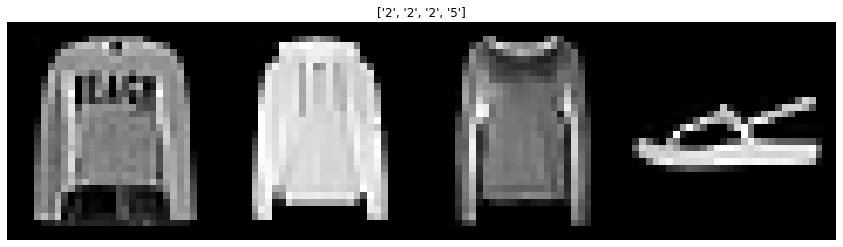

In [9]:
images, labels = show_batch_images(trainloader)

In [10]:
class NormalNet(nn.Module):
    def __init__(self): 
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),  # 28 x 28 = 784
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10) # FashionMnist dataset class는 10개이므로 이와 같이 작성
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1) # image를 batchsize, 28*28 크기로 change. flatten이라 보면 된다.
        x = self.classifier(x)
        return x

In [11]:
class BNNet(nn.Module):
    def __init__(self): 
        super(BNNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.BatchNorm1d(48), # BatchNorm1d에서 사용되는 parameter는 feature 개수로 이전 계층의 출력 채널이 된다.
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [12]:
model = NormalNet()
print(model)

NormalNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [13]:
model_bn = BNNet()
print(model_bn)

BNNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [14]:
batch_size = 512

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [16]:
loss_fn = nn.CrossEntropyLoss() # classifier 문제니까 crossentropy loss를 사용
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

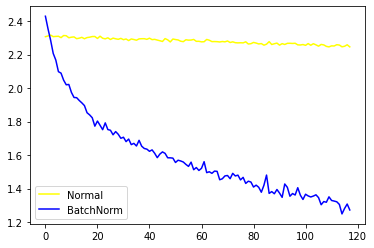

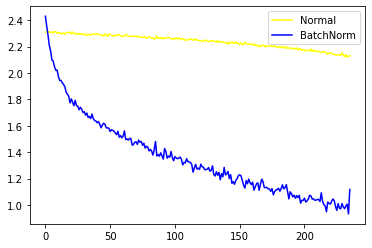

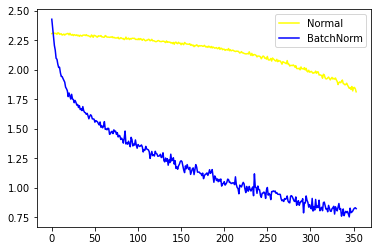

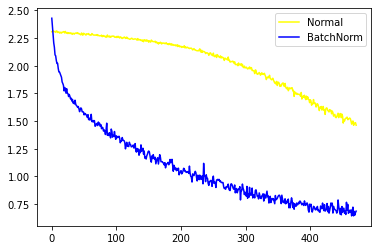

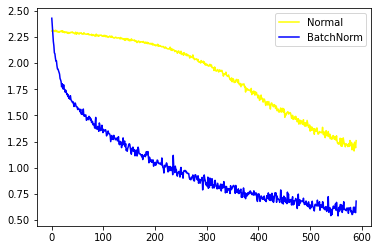

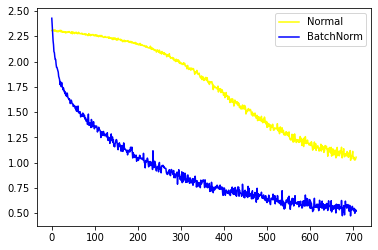

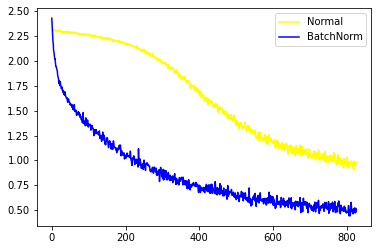

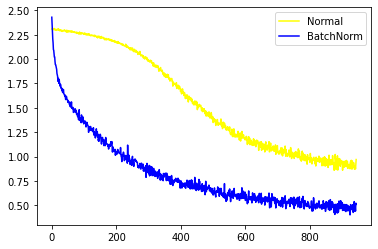

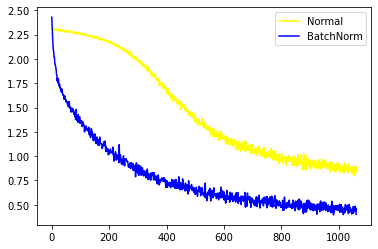

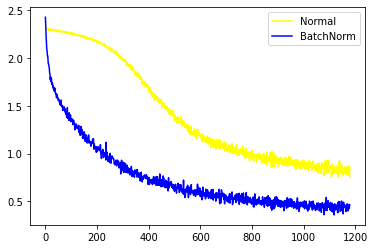

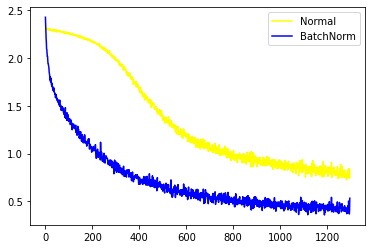

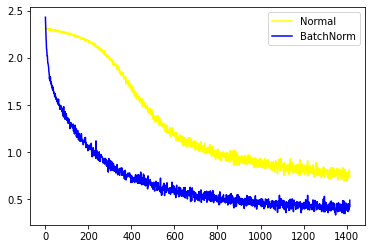

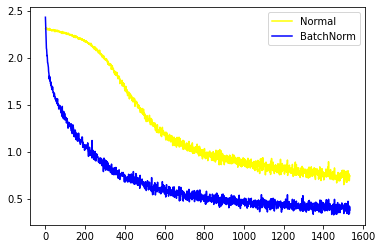

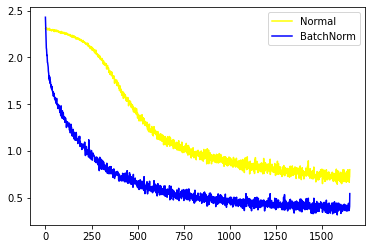

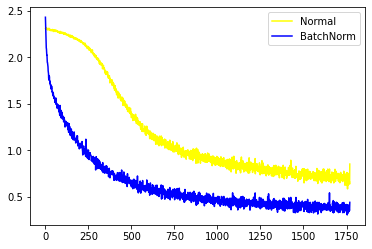

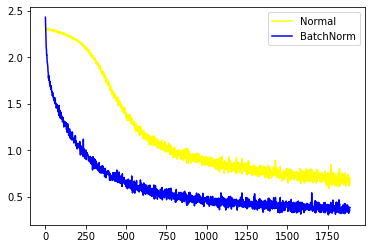

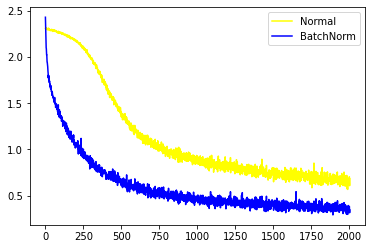

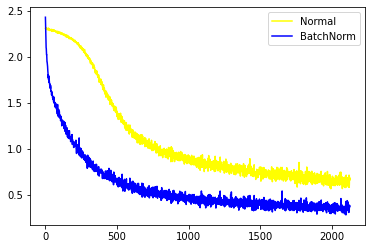

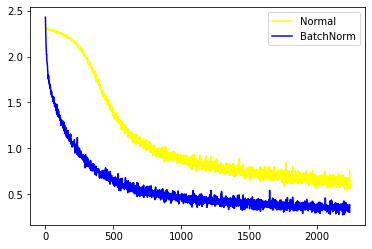

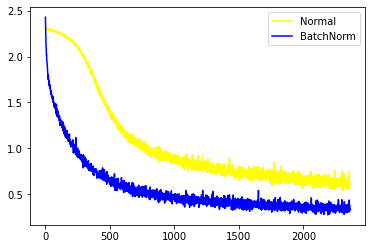

In [17]:
loss_arr = []
loss_bn_arr = []
max_epochs = 20

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = model(inputs) # without batch normalization model에 대한 pred
        loss = loss_fn(outputs, labels) # without batch normalization model에 대한 loss
        loss.backward()
        opt.step()
        
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs) # with batch normalization model에 대한 pred
        loss_bn = loss_fn(outputs_bn, labels) # with batch normalization model에 대한 loss
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
           
    plt.plot(loss_arr, 'yellow', label='Normal')
    plt.plot(loss_bn_arr, 'blue', label='BatchNorm')    
    plt.legend()
    plt.show()

In [21]:
# dropout 예제

In [26]:

x = torch.linspace(-1, 1, 50)
print(x, x.shape)
y = torch.unsqueeze(x, 1)
print(y, y.shape)

tensor([-1.0000, -0.9592, -0.9184, -0.8776, -0.8367, -0.7959, -0.7551, -0.7143,
        -0.6735, -0.6327, -0.5918, -0.5510, -0.5102, -0.4694, -0.4286, -0.3878,
        -0.3469, -0.3061, -0.2653, -0.2245, -0.1837, -0.1429, -0.1020, -0.0612,
        -0.0204,  0.0204,  0.0612,  0.1020,  0.1429,  0.1837,  0.2245,  0.2653,
         0.3061,  0.3469,  0.3878,  0.4286,  0.4694,  0.5102,  0.5510,  0.5918,
         0.6327,  0.6735,  0.7143,  0.7551,  0.7959,  0.8367,  0.8776,  0.9184,
         0.9592,  1.0000]) torch.Size([50])
tensor([[-1.0000],
        [-0.9592],
        [-0.9184],
        [-0.8776],
        [-0.8367],
        [-0.7959],
        [-0.7551],
        [-0.7143],
        [-0.6735],
        [-0.6327],
        [-0.5918],
        [-0.5510],
        [-0.5102],
        [-0.4694],
        [-0.4286],
        [-0.3878],
        [-0.3469],
        [-0.3061],
        [-0.2653],
        [-0.2245],
        [-0.1837],
        [-0.1429],
        [-0.1020],
        [-0.0612],
        [-0.0204],
 

In [20]:
# 데이터셋의 분포를 출력하기 위해 작성
N = 50
noise = 0.3

x_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1) # -1 ~ 1 사이를 50개로 균등하게 나누고 50, 1 차원의 tensor로 change
y_train = x_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1)) # torch.normal(x, y)일 때 x는 평균, y는 표준편차를 의미하고
# torch.normal은 정규분포로부터 무작위로 표본 추출을 한다.
# 즉 평균은 (N, 1) 차원을 0으로 채워진 tensor가 되고 표준편차는 (N, 1) 차원을 1로 채워진 tensor가 된다.
x_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_test = x_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

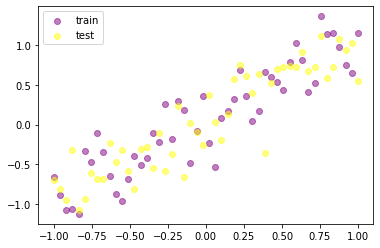

In [28]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple', alpha=0.5, label='train')
# x_train.data.numpy()는 x축, y_train.data.numpy()는 y축에 위치할 데이터, alpha는 투명도, label은 plt.legend()와 함께 사용해야 한다.
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [29]:
N_h = 100
model = torch.nn.Sequential( # without dropout model
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

model_dropout = torch.nn.Sequential( # with dropout
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

In [30]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

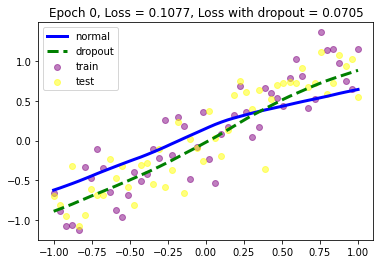

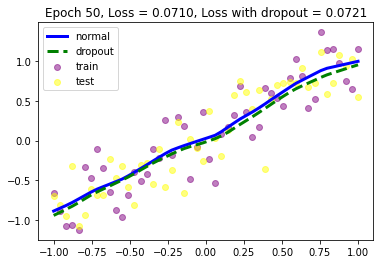

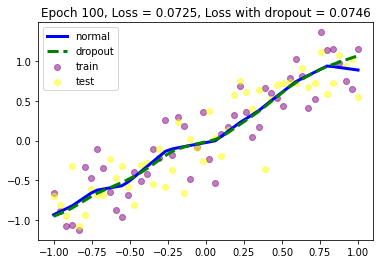

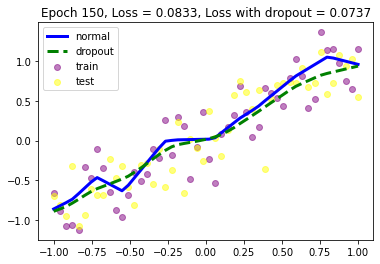

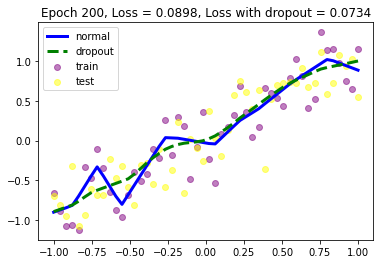

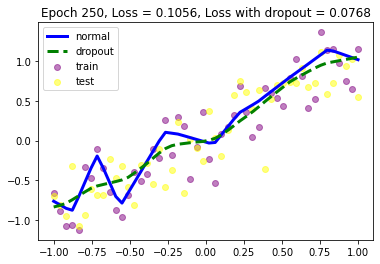

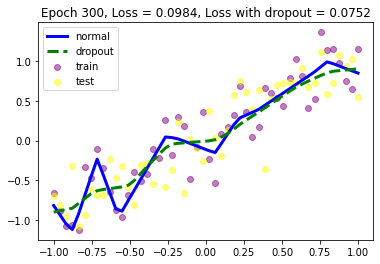

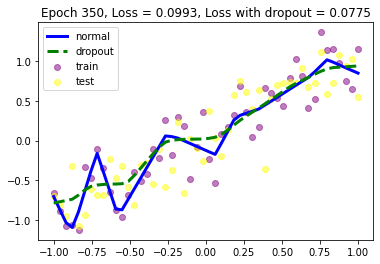

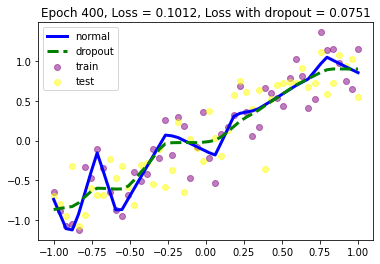

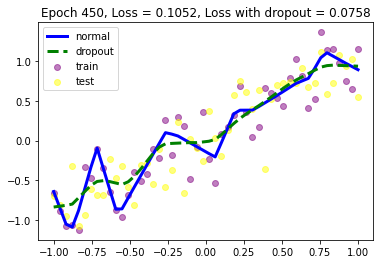

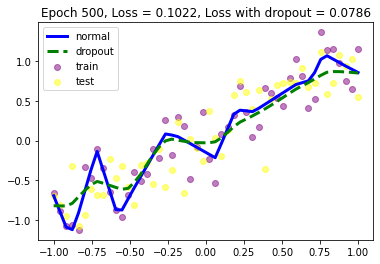

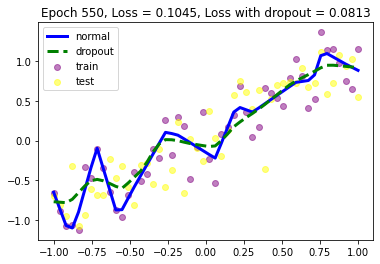

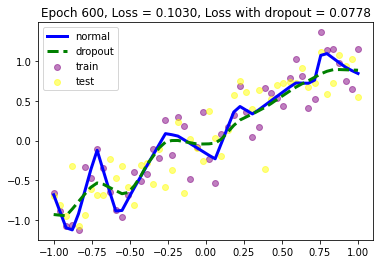

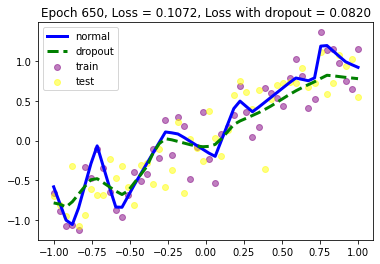

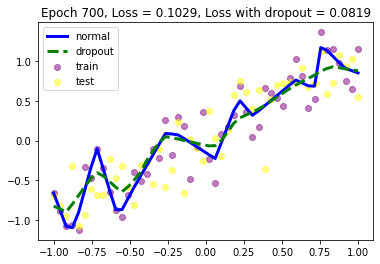

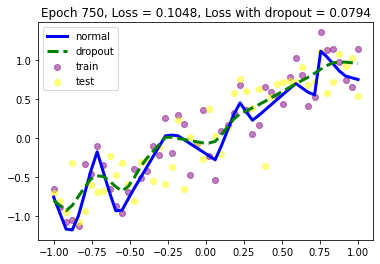

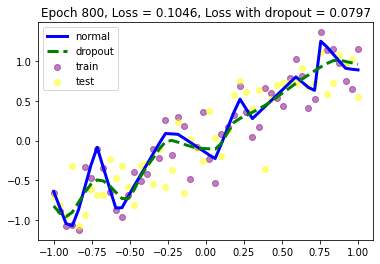

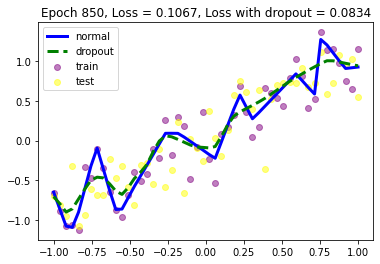

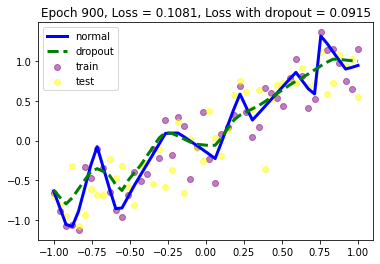

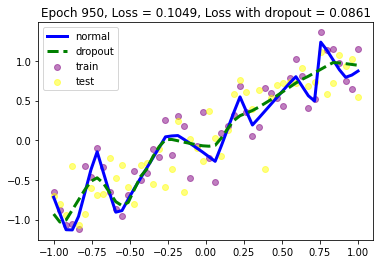

In [31]:
max_epochs = 1000
for epoch in range(max_epochs):    
    pred = model(x_train) 
    loss = loss_fn(pred, y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    pred_dropout = model_dropout(x_train)
    loss_dropout = loss_fn(pred_dropout, y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()    
    # x_train, y_train 값으로 train을 하고 x_test, y_test 값으로 정확도 측정
    
    if epoch % 50 == 0:        
        model.eval()
        model_dropout.eval()
        
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)
        
        test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = loss_fn(test_pred_dropout, y_test)
        
        plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple', alpha=0.5, label='train')
        plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
        plt.plot(x_test.data.numpy(), test_pred.data.numpy(), 'b-', lw=3, label='normal')
        plt.plot(x_test.data.numpy(), test_pred_dropout.data.numpy(), 'g--', lw=3,  label='dropout')
        
        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        plt.legend()
        model.train()
        model_dropout.train()        
        plt.pause(0.05)

# dropout을 적용한 model의 정확도가 좀 더 좋은 것을 볼 수 있다.
# dropout을 적용하지 않은 model은 train dataset을 너무 따라가 overfitting되는 경향을 보인다.

### 8.3.3 조기 종료를 이용한 성능 최적화
- 조기 종료(early stopping)는 뉴럴 네트워크가 과적합을 회피하는 규제 기법이다.
- train, valid dataset을 따로 준비하고 매 epoch마다 valid에 대한 오차를 측정해 모델 학습의 종료 시점을 제어한다.
- 즉, overfitting이 일어나기 전까지 train, valid dataset에 대한 오차는 줄어들지만 overfitting이 일어나면 train dataset에 대한 오차는 줄어들지만 valid dataset에 대한 오차는 증가하므로 valid dataset에 대한 오차가 증가하는 순간 train을 멈춘다.
- 하지만 early stopping은 학습을 멈추는 시점을 결정할 뿐이지 최고의 성능을 갖는 모델을 보장하지는 않는다.

In [ ]:
# early stopping & learning rate 예제

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms, datasets

import matplotlib
import matplotlib.pyplot as plt
import time
import argparse
from tqdm import tqdm
matplotlib.style.use('ggplot') # 출력 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 하는 스타일

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [43]:
# data preprocessing
train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [44]:
# 핫도그 이미지와 아닌 이미지가 존재
# https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog or Food 101 dataset
train_dataset = datasets.ImageFolder(
    root=r'/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/archive/train', 
    transform=train_transform
)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True,
)
val_dataset = datasets.ImageFolder(
    root=r'/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/archive/test',
    transform=val_transform
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=32, shuffle=False,
)

In [45]:
def resnet50(pretrained=True): # resnet50 model을 호출하는 함수 생성
    model = models.resnet50(progress=True, pretrained=pretrained) 
    if requires_grad == False: # parameter를 고정해 backward() 중에 기울기가 계산되지 않도록 설정
        for param in model.parameters(): 
            param.requires_grad = False
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    model.fc = nn.Linear(2048, 2) # 제공하는 resnet50 model의 fully connected layer를 change
    return model

### 학습률 감소(learning rate decay)
- 학습률에 대한 값을 고정시켜서 모델을 train 하는 것이 아니라 학습이 진행되는 과정에서 학습률을 조금씩 낮추어 주는 성능 튜닝 기법
- 학습률 감소는 학습률 스케줄러(learning rate scheduler) 이용
- 주어진 'patience' 횟수만큼 valid dataset에 대한 오차 감소가 없으면 주어진 'factor'만큼 learning rate를 감소시켜서 모델 학습의 최적화가 가능하도록 한다

In [46]:
class LRScheduler():
    def __init__(
        self, optimizer, patience=5, min_lr=1e-6, factor=0.5
    ):
        self.optimizer = optimizer
        self.patience = patience 
        self.min_lr = min_lr
        self.factor = factor 
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
                self.optimizer,
                mode='min',
                patience=self.patience,
                factor=self.factor,
                min_lr=self.min_lr,
                verbose=True
            )
        # lr_scheduler.ReduceLROnPlateau: ReduceLROnPlateau는 검증 데이터셋에 대한 오차의 변동이 없으면 학습률을 factor 배로 감소시킨다
        # mode: 언제 learning rate를 조정할지에 대한 기준이 되는 값. 만약 valid dataset에 대한 오차를 기준으로 사용하면 오차가 더 이상 감소되지 않을 때 학습률을 조정
        # 이때 오차 값이 최소(min)가 되어야 하는지 최대(max)가 되어야 한느지 알려주는 파라미터. 만약 기준을 valid acc를 한다면 max로 지정.
        # patience: 학습률을 업데이트하기 전에 몇 번의 epoch을 기다려야 하는지 결정
        # factor: 학습률을 얼마나 감소시킬지 지정. 기존 learning rate에 factor를 곱해 그 다음 learning rate를 설정
        # min_lr: 학습률의 하한선. 예를 들어 현재 learning rate가 0.1이고 factor가 0.5, min_lr이 0.03이라면 첫 번째로 콜백 함수가 적용될 때 학습률의 하한선 값은
        # 0.03 * 0.1 * 0.5 가 된다.
        # verbose: 조기 종료의 시작과 끝을 출력하기 위해서 사용
    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

In [54]:
class EarlyStopping():
    def __init__(self, patience=5, verbose=False, delta=0, path='/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None # valid dataset에 대한 오차 최적화 값
        self.early_stop = False # 조기 종료를 의미
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path # model save path
        
    def __call__(self, val_loss, model): # epoch 만큼  train이 반복되면서 best_loss가 경신되고, best_loss의 진전이 없으면 early stop하고 model 저장
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta: # best_loss가 경신되지 않는 경우
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience: # patience만큼 best_loss의 경신이 이루어지지 않으면 early_stop
                self.early_stop = True
        else: # train하면서 best_loss가 경신되는 경우
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
# keras에서 제공하는 early stop을 사용해도 된다.
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('checkpoint-epochh.5'.format(EPOCH, BATCH_SIZE), # file name
                             monitor = 'val_loss',# val_loss 값이 개선되었을 때 호출
                             verbose = 1,
                             save_best_only = True, # 가장 최적의 값만 저장
                             mode = 'auto' # auto일 시 시스템이 알아서 best 값을 찾아줌
                             )

earlystopping = EarlyStopping(monitor = 'val_loss', # 학습률 update 기준 설정
                              patience = 10
                              )

In [48]:
parser = argparse.ArgumentParser() # 인수 값을 받을 수 있는 인스턴스 생성
parser.add_argument('--lr-scheduler', dest='lr_scheduler', action='store_true') # 원하는 인수 값을 추가. parser.add_argument()는 인수 개수만큼 만들어 줘야 한다.
# '--lr-scheduler': 옵션 문자열의 이름으로 명령을 실행할 때 사용
# dest: 입력 값이 저장되는 변수 위 경우 lr_scheduler 변수에 입력 값이 저장된다
# action: store_true로 지정하면 입력 값을 dest paramter에 의해 생성된 변수를 저장한다
parser.add_argument('--early-stopping', dest='early_stopping', action='store_true')
parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1") #주피터 노트북에서 실행할때 필요합니다
args = vars(parser.parse_args())
# 입력 받은 인수 값이 실제로 args 변수에 저장된다

In [49]:
#!pip install ipywidgets 혹은
#anaconda prompt에서 conda install -c conda-forge ipywidgets 실행
print(f"Computation device: {device}\n")
model = models.resnet50(pretrained=True).to(device) # pretrain된 resnet50 사용
total_params = sum(p.numel() for p in model.parameters()) # resnet50의 parameter 수
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad) # 학습 가능한 parameter 수
print(f"{total_trainable_params:,} training parameters.")

Computation device: cuda



/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

25,557,032 total parameters.
25,557,032 training parameters.


In [61]:
lr = 0.001
epochs = 100
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [51]:
loss_plot_name = 'loss'
acc_plot_name = 'accuracy'
model_name = 'model'

In [56]:
if args['lr_scheduler']: # lr_scheduler 인수를 사용할 때 오차, 정확도 및 모델의 이름을 정의
    print('INFO: Initializing learning rate scheduler')
    lr_scheduler = LRScheduler(optimizer)
    loss_plot_name = 'lrs_loss'
    acc_plot_name = 'lrs_accuracy'
    model_name = 'lrs_model'
if args['early_stopping']: # early_stopping 인수를 사용할 때 오차, 정확도 및 모델의 이름을 정의
    print('INFO: Initializing early stopping')
    early_stopping = EarlyStopping()
    loss_plot_name = 'es_loss'
    acc_plot_name = 'es_accuracy'
    model_name = 'es_model'

In [64]:
def training(model, train_dataloader, train_dataset, optimizer, criterion):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(train_dataloader), total=int(len(train_dataset)/train_dataloader.batch_size))
    for i, data in prog_bar:
        counter += 1
        data, target = data[0].to(device), data[1].to(device)
        total += target.size(0)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        train_running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
        
    train_loss = train_running_loss / counter
    train_accuracy = 100. * train_running_correct / total
    return train_loss, train_accuracy

In [63]:
def validate(model, test_dataloader, val_dataset, criterion):
    print('Validating')
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(test_dataloader), total=int(len(val_dataset)/test_dataloader.batch_size))
    with torch.no_grad():
        for i, data in prog_bar:
            counter += 1
            data, target = data[0].to(device), data[1].to(device)
            total += target.size(0)
            outputs = model(data)
            loss = criterion(outputs, target)
            
            val_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            val_running_correct += (preds == target).sum().item()
        
        val_loss = val_running_loss / counter
        val_accuracy = 100. * val_running_correct / total
        return val_loss, val_accuracy

In [66]:
train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
start = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy = training(
        model, train_dataloader, train_dataset, optimizer, criterion
    )
    val_epoch_loss, val_epoch_accuracy = validate(
        model, val_dataloader, val_dataset, criterion
    )
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    if args['lr_scheduler']:
        lr_scheduler(val_epoch_loss)
    if args['early_stopping']:
        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            break
    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_accuracy:.2f}")
    print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_accuracy:.2f}')
end = time.time()
print(f"Training time: {(end-start)/60:.3f} minutes")

Epoch 1 of 100
Training


16it [02:21,  8.86s/it]


Validating


16it [02:37,  9.87s/it]


Train Loss: 1.3414, Train Acc: 63.45
Val Loss: 3.6836, Val Acc: 44.40
Epoch 2 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:04,  3.23it/s]


Train Loss: 0.5746, Train Acc: 73.49
Val Loss: 0.8954, Val Acc: 62.00
Epoch 3 of 100
Training


16it [00:08,  1.94it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.3874, Train Acc: 84.34
Val Loss: 1.6406, Val Acc: 63.00
Epoch 4 of 100
Training


16it [00:08,  1.94it/s]


Validating


16it [00:05,  3.12it/s]


Train Loss: 0.4914, Train Acc: 79.52
Val Loss: 0.9923, Val Acc: 61.80
Epoch 5 of 100
Training


16it [00:08,  1.91it/s]


Validating


16it [00:04,  3.21it/s]


Train Loss: 0.4440, Train Acc: 78.51
Val Loss: 1.3786, Val Acc: 66.80
Epoch 6 of 100
Training


16it [00:08,  1.92it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.4323, Train Acc: 80.32
Val Loss: 0.5799, Val Acc: 67.20
Epoch 7 of 100
Training


16it [00:08,  1.94it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.2911, Train Acc: 87.75
Val Loss: 0.5944, Val Acc: 72.60
Epoch 8 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.2231, Train Acc: 92.97
Val Loss: 0.7524, Val Acc: 72.60
Epoch 9 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:04,  3.20it/s]


Train Loss: 0.2236, Train Acc: 91.97
Val Loss: 0.6338, Val Acc: 76.60
Epoch 10 of 100
Training


16it [00:08,  1.92it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.1797, Train Acc: 92.77
Val Loss: 0.6395, Val Acc: 77.20
Epoch 11 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.1404, Train Acc: 94.98
Val Loss: 0.6564, Val Acc: 79.00
Epoch 12 of 100
Training


16it [00:08,  1.91it/s]


Validating


16it [00:04,  3.23it/s]


Train Loss: 0.1399, Train Acc: 94.58
Val Loss: 0.9208, Val Acc: 74.20
Epoch 13 of 100
Training


16it [00:08,  1.92it/s]


Validating


16it [00:05,  3.15it/s]


Train Loss: 0.2498, Train Acc: 88.96
Val Loss: 1.7288, Val Acc: 64.60
Epoch 14 of 100
Training


16it [00:08,  1.91it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.3283, Train Acc: 85.74
Val Loss: 0.6359, Val Acc: 78.60
Epoch 15 of 100
Training


16it [00:08,  1.91it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.2138, Train Acc: 90.96
Val Loss: 0.9356, Val Acc: 75.00
Epoch 16 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.13it/s]


Train Loss: 0.2317, Train Acc: 90.56
Val Loss: 0.7053, Val Acc: 73.80
Epoch 17 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.2251, Train Acc: 90.56
Val Loss: 0.7756, Val Acc: 74.40
Epoch 18 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.1994, Train Acc: 92.57
Val Loss: 0.9413, Val Acc: 69.40
Epoch 19 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.1132, Train Acc: 95.78
Val Loss: 0.6458, Val Acc: 78.60
Epoch 20 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.20it/s]


Train Loss: 0.0926, Train Acc: 97.19
Val Loss: 0.8844, Val Acc: 77.60
Epoch 21 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:04,  3.20it/s]


Train Loss: 0.0876, Train Acc: 96.79
Val Loss: 0.7593, Val Acc: 76.80
Epoch 22 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.08it/s]


Train Loss: 0.0806, Train Acc: 97.19
Val Loss: 0.5282, Val Acc: 83.60
Epoch 23 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.1400, Train Acc: 94.58
Val Loss: 1.4670, Val Acc: 67.60
Epoch 24 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.12it/s]


Train Loss: 0.1276, Train Acc: 95.58
Val Loss: 0.9805, Val Acc: 75.60
Epoch 25 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.1252, Train Acc: 95.98
Val Loss: 1.3980, Val Acc: 67.40
Epoch 26 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.1573, Train Acc: 94.78
Val Loss: 0.8189, Val Acc: 80.40
Epoch 27 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.2094, Train Acc: 91.57
Val Loss: 1.7008, Val Acc: 60.60
Epoch 28 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.13it/s]


Train Loss: 0.1787, Train Acc: 93.78
Val Loss: 1.2528, Val Acc: 71.00
Epoch 29 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.2100, Train Acc: 90.96
Val Loss: 1.1073, Val Acc: 71.00
Epoch 30 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.1218, Train Acc: 95.18
Val Loss: 1.2449, Val Acc: 72.80
Epoch 31 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.09it/s]


Train Loss: 0.1070, Train Acc: 96.39
Val Loss: 0.6467, Val Acc: 78.80
Epoch 32 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.0914, Train Acc: 96.59
Val Loss: 0.6093, Val Acc: 78.80
Epoch 33 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0571, Train Acc: 98.59
Val Loss: 0.7495, Val Acc: 77.80
Epoch 34 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.11it/s]


Train Loss: 0.0729, Train Acc: 97.79
Val Loss: 0.8756, Val Acc: 77.40
Epoch 35 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.1092, Train Acc: 96.39
Val Loss: 1.0377, Val Acc: 75.00
Epoch 36 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.1787, Train Acc: 92.17
Val Loss: 0.8070, Val Acc: 72.80
Epoch 37 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.1180, Train Acc: 96.18
Val Loss: 0.7154, Val Acc: 76.60
Epoch 38 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.0792, Train Acc: 97.59
Val Loss: 0.8771, Val Acc: 72.60
Epoch 39 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0817, Train Acc: 97.19
Val Loss: 0.8913, Val Acc: 75.00
Epoch 40 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.12it/s]


Train Loss: 0.0662, Train Acc: 97.79
Val Loss: 0.7974, Val Acc: 76.60
Epoch 41 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0456, Train Acc: 98.80
Val Loss: 0.6950, Val Acc: 79.20
Epoch 42 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:04,  3.21it/s]


Train Loss: 0.0313, Train Acc: 99.00
Val Loss: 0.8571, Val Acc: 77.20
Epoch 43 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0317, Train Acc: 98.80
Val Loss: 0.8518, Val Acc: 74.00
Epoch 44 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0476, Train Acc: 98.19
Val Loss: 1.1773, Val Acc: 74.00
Epoch 45 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.15it/s]


Train Loss: 0.0458, Train Acc: 98.19
Val Loss: 0.9175, Val Acc: 78.20
Epoch 46 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.0540, Train Acc: 98.19
Val Loss: 0.9387, Val Acc: 75.80
Epoch 47 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.0410, Train Acc: 98.19
Val Loss: 0.7263, Val Acc: 78.20
Epoch 48 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.0348, Train Acc: 98.80
Val Loss: 1.3223, Val Acc: 74.80
Epoch 49 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.07it/s]


Train Loss: 0.0524, Train Acc: 97.59
Val Loss: 1.2444, Val Acc: 72.60
Epoch 50 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.12it/s]


Train Loss: 0.0441, Train Acc: 98.59
Val Loss: 1.1177, Val Acc: 72.60
Epoch 51 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.20it/s]


Train Loss: 0.1050, Train Acc: 96.99
Val Loss: 1.3216, Val Acc: 75.60
Epoch 52 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.15it/s]


Train Loss: 0.0575, Train Acc: 97.39
Val Loss: 0.8059, Val Acc: 76.00
Epoch 53 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.06it/s]


Train Loss: 0.0330, Train Acc: 98.59
Val Loss: 1.1344, Val Acc: 75.60
Epoch 54 of 100
Training


16it [00:08,  1.85it/s]


Validating


16it [00:05,  3.13it/s]


Train Loss: 0.0844, Train Acc: 97.19
Val Loss: 0.9270, Val Acc: 76.80
Epoch 55 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.15it/s]


Train Loss: 0.0593, Train Acc: 96.99
Val Loss: 1.0208, Val Acc: 76.40
Epoch 56 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:04,  3.20it/s]


Train Loss: 0.0934, Train Acc: 95.78
Val Loss: 0.9584, Val Acc: 76.80
Epoch 57 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.20it/s]


Train Loss: 0.0336, Train Acc: 98.80
Val Loss: 0.6558, Val Acc: 79.20
Epoch 58 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.11it/s]


Train Loss: 0.0384, Train Acc: 99.20
Val Loss: 0.9801, Val Acc: 77.20
Epoch 59 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.0788, Train Acc: 96.99
Val Loss: 1.2884, Val Acc: 71.80
Epoch 60 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.1266, Train Acc: 95.38
Val Loss: 1.2360, Val Acc: 73.40
Epoch 61 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.1108, Train Acc: 96.39
Val Loss: 1.3180, Val Acc: 66.60
Epoch 62 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0683, Train Acc: 96.99
Val Loss: 0.9306, Val Acc: 73.40
Epoch 63 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0784, Train Acc: 97.39
Val Loss: 1.0750, Val Acc: 73.60
Epoch 64 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.20it/s]


Train Loss: 0.0747, Train Acc: 95.78
Val Loss: 1.2818, Val Acc: 70.20
Epoch 65 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0914, Train Acc: 96.18
Val Loss: 1.7210, Val Acc: 67.00
Epoch 66 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0796, Train Acc: 97.59
Val Loss: 0.9154, Val Acc: 74.80
Epoch 67 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.13it/s]


Train Loss: 0.0432, Train Acc: 98.39
Val Loss: 0.6940, Val Acc: 80.00
Epoch 68 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.0421, Train Acc: 99.00
Val Loss: 0.8872, Val Acc: 77.00
Epoch 69 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0363, Train Acc: 99.20
Val Loss: 1.0043, Val Acc: 75.00
Epoch 70 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0323, Train Acc: 98.39
Val Loss: 0.9071, Val Acc: 80.40
Epoch 71 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0800, Train Acc: 96.99
Val Loss: 1.5025, Val Acc: 71.20
Epoch 72 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.2322, Train Acc: 91.97
Val Loss: 1.7513, Val Acc: 64.20
Epoch 73 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.1526, Train Acc: 93.98
Val Loss: 1.1740, Val Acc: 68.20
Epoch 74 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:04,  3.21it/s]


Train Loss: 0.0977, Train Acc: 96.59
Val Loss: 0.7614, Val Acc: 77.80
Epoch 75 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:04,  3.20it/s]


Train Loss: 0.0550, Train Acc: 98.19
Val Loss: 0.7784, Val Acc: 73.80
Epoch 76 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.06it/s]


Train Loss: 0.0411, Train Acc: 98.39
Val Loss: 0.8355, Val Acc: 74.60
Epoch 77 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.15it/s]


Train Loss: 0.0365, Train Acc: 99.20
Val Loss: 0.8382, Val Acc: 78.40
Epoch 78 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.13it/s]


Train Loss: 0.0264, Train Acc: 99.20
Val Loss: 0.9851, Val Acc: 75.20
Epoch 79 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.0136, Train Acc: 99.60
Val Loss: 0.7630, Val Acc: 79.60
Epoch 80 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.0229, Train Acc: 99.00
Val Loss: 0.7722, Val Acc: 78.40
Epoch 81 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0142, Train Acc: 99.20
Val Loss: 0.9232, Val Acc: 74.40
Epoch 82 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.0233, Train Acc: 99.40
Val Loss: 0.8146, Val Acc: 77.40
Epoch 83 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.0171, Train Acc: 99.40
Val Loss: 0.8673, Val Acc: 79.60
Epoch 84 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.18it/s]


Train Loss: 0.0165, Train Acc: 99.40
Val Loss: 0.8915, Val Acc: 76.00
Epoch 85 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.11it/s]


Train Loss: 0.0119, Train Acc: 99.80
Val Loss: 0.9088, Val Acc: 76.40
Epoch 86 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.0089, Train Acc: 99.80
Val Loss: 0.8713, Val Acc: 78.20
Epoch 87 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.20it/s]


Train Loss: 0.0044, Train Acc: 99.80
Val Loss: 0.7708, Val Acc: 79.20
Epoch 88 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:04,  3.20it/s]


Train Loss: 0.0092, Train Acc: 99.80
Val Loss: 0.8161, Val Acc: 78.20
Epoch 89 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.16it/s]


Train Loss: 0.0139, Train Acc: 99.60
Val Loss: 0.9468, Val Acc: 78.20
Epoch 90 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.17it/s]


Train Loss: 0.0102, Train Acc: 99.80
Val Loss: 1.1013, Val Acc: 77.60
Epoch 91 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.20it/s]


Train Loss: 0.0233, Train Acc: 99.20
Val Loss: 0.8265, Val Acc: 79.80
Epoch 92 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.19it/s]


Train Loss: 0.0531, Train Acc: 98.59
Val Loss: 1.2986, Val Acc: 76.20
Epoch 93 of 100
Training


16it [00:08,  1.90it/s]


Validating


16it [00:05,  3.10it/s]


Train Loss: 0.0454, Train Acc: 98.19
Val Loss: 1.6308, Val Acc: 71.80
Epoch 94 of 100
Training


16it [00:08,  1.89it/s]


Validating


16it [00:05,  3.14it/s]


Train Loss: 0.0428, Train Acc: 98.19
Val Loss: 1.2059, Val Acc: 75.20
Epoch 95 of 100
Training


16it [00:08,  1.88it/s]


Validating


16it [00:05,  3.12it/s]


Train Loss: 0.0293, Train Acc: 99.20
Val Loss: 1.0978, Val Acc: 72.60
Epoch 96 of 100
Training


16it [00:08,  1.87it/s]


Validating


16it [00:05,  3.15it/s]


Train Loss: 0.0541, Train Acc: 98.39
Val Loss: 1.1502, Val Acc: 73.20
Epoch 97 of 100
Training


16it [00:08,  1.82it/s]


Validating


16it [00:05,  3.11it/s]


Train Loss: 0.0628, Train Acc: 97.59
Val Loss: 1.5201, Val Acc: 69.60
Epoch 98 of 100
Training


16it [00:08,  1.86it/s]


Validating


16it [00:05,  3.07it/s]


Train Loss: 0.0590, Train Acc: 97.39
Val Loss: 0.9850, Val Acc: 76.60
Epoch 99 of 100
Training


16it [00:08,  1.85it/s]


Validating


16it [00:05,  3.02it/s]


Train Loss: 0.0654, Train Acc: 97.79
Val Loss: 0.8565, Val Acc: 76.80
Epoch 100 of 100
Training


16it [00:08,  1.85it/s]


Validating


16it [00:05,  3.12it/s]

Train Loss: 0.0588, Train Acc: 97.99
Val Loss: 0.9057, Val Acc: 76.80
Training time: 27.364 minutes


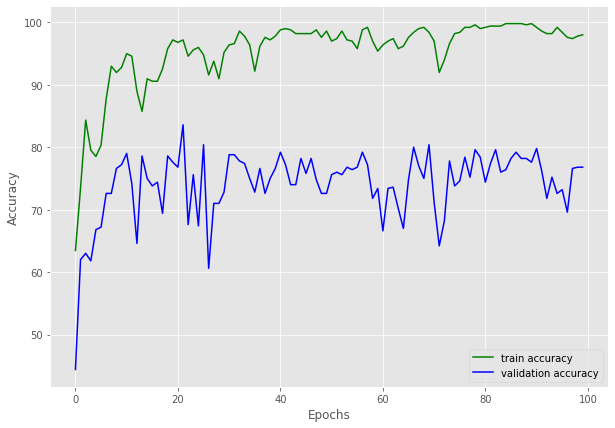

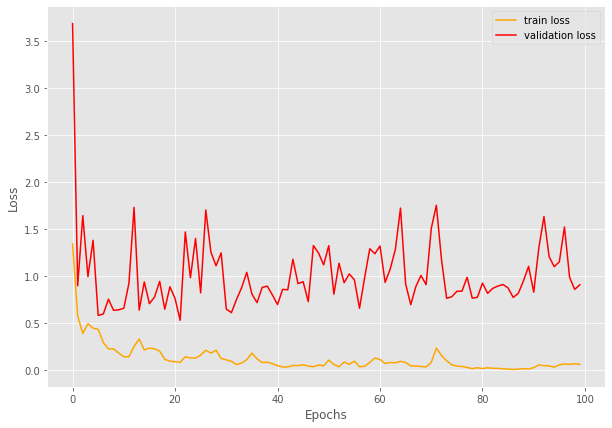

Saving model...
TRAINING COMPLETE


In [71]:
# 여기서 그려지는 그래프는 아무런 옵션 없이 train한 결과
# early stop, learning_rate decay를 넣으려면 설정을 따로해서 진행하면 된다.
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/img{acc_plot_name}.png")
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/img{loss_plot_name}.png")
plt.show()
    
print('Saving model...')
torch.save(model.state_dict(), f"/content/drive/MyDrive/deel_learning_pytorch_book/deep learning pytorch book/8장/data/{model_name}.pth")
print('TRAINING COMPLETE')
